   Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
5           5  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
6           6  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
7           7  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
8           8  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
9           9  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                               Track  \
0                                     Feel Good Inc.   
1                            

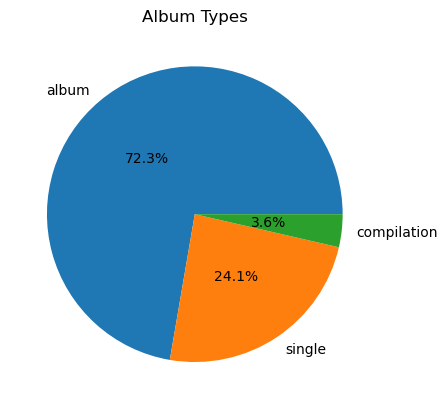

Artist
Ed Sheeran                 1.546021e+10
CoComelon                  1.460167e+10
Katy Perry                 1.312063e+10
Charlie Puth               1.216759e+10
Luis Fonsi                 1.162811e+10
Justin Bieber              1.099079e+10
Daddy Yankee               1.086828e+10
Bruno Mars                 1.023184e+10
Macklemore & Ryan Lewis    1.012206e+10
Coldplay                   9.997278e+09
Name: Views, dtype: float64
Artist
Post Malone        1.525126e+10
Ed Sheeran         1.439488e+10
Dua Lipa           1.340808e+10
XXXTENTACION       1.322435e+10
The Weeknd         1.303197e+10
Imagine Dragons    1.185831e+10
Coldplay           1.177848e+10
Khalid             1.138684e+10
Ariana Grande      1.085741e+10
Billie Eilish      1.074717e+10
Name: Stream, dtype: float64


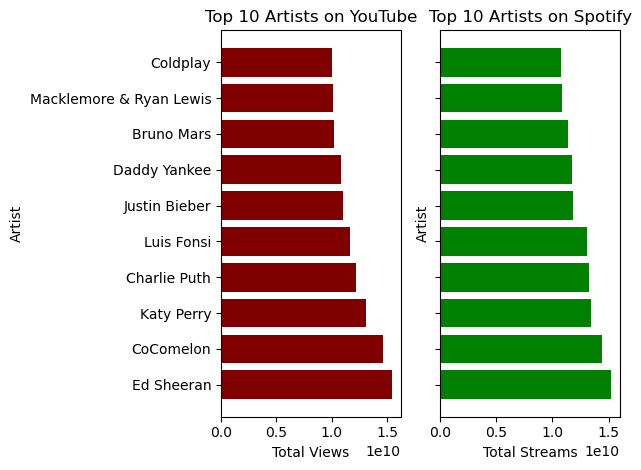


Remarks about the Top 10 Artists on Youtube:
These artists have accumulated the highest total views on YouTube.

Remarks about the Top 10 Artists on Spotify:
These artists have accumulated the highest total streams on Spotify.

Top 10 Songs with Most Views:
                                    Track         Views
1147                            Despacito  8.079649e+09
365                             Despacito  8.079647e+09
12452                        Shape of You  5.908398e+09
14580  See You Again (feat. Charlie Puth)  5.773798e+09
12469  See You Again (feat. Charlie Puth)  5.773797e+09
20303                   Wheels on the Bus  4.898831e+09
10686      Uptown Funk (feat. Bruno Mars)  4.821016e+09
8937                Gangnam Style (강남스타일)  4.679767e+09
9569                                Sugar  3.817733e+09
13032                                Roar  3.725749e+09

Top 10 Songs with Most Comments:
                             Track    Comments
14561                     Dynamite  16083138

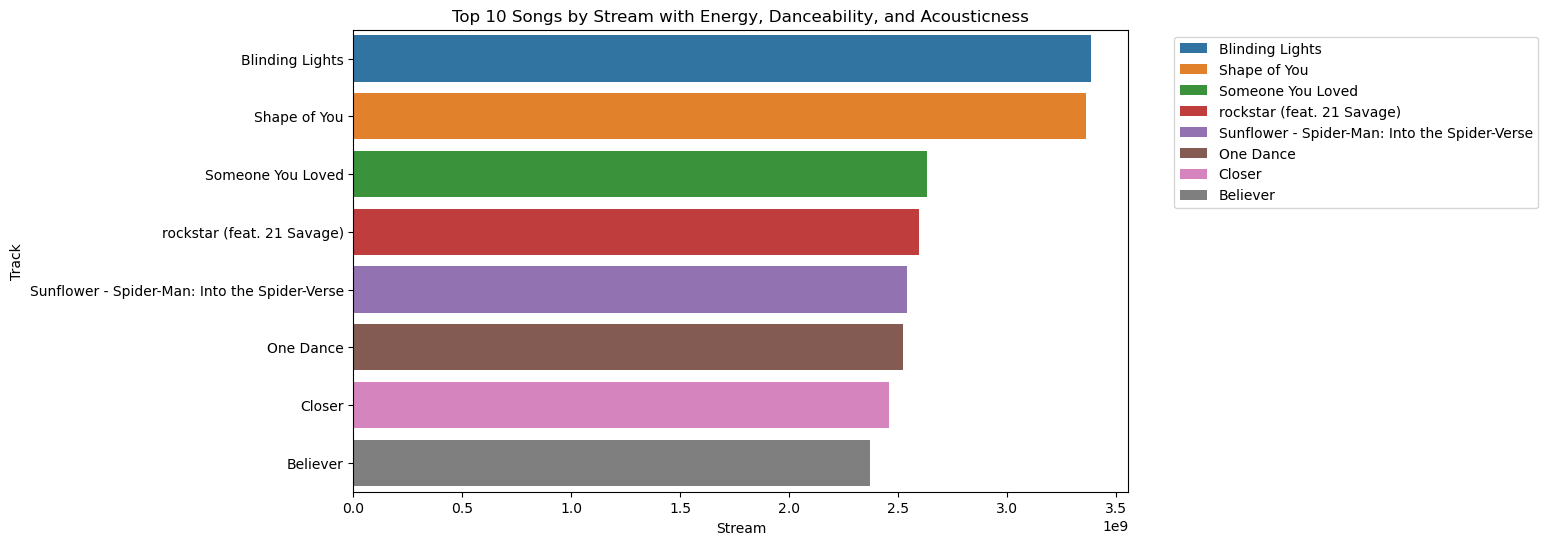


Remarks about the Top 10 Songs by Stream:
These songs have the highest number of streams on Spotify.


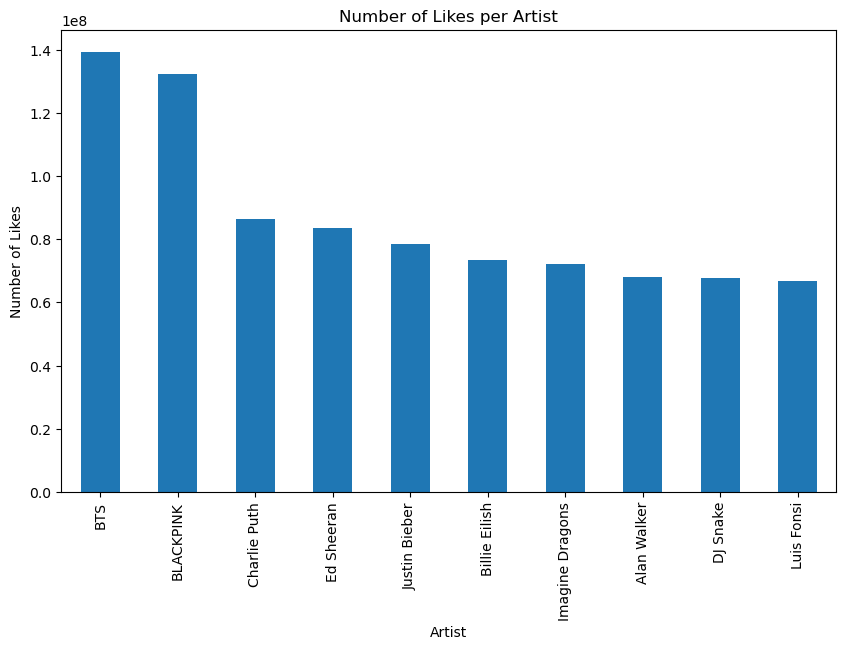


Remarks about the Top 10 Artists with Most Likes:
These artists have songs with the highest total likes on YouTube.

Top Performers based on Single Releases:
                       Views       Likes
Artist                                  
BLACKPINK       7.329516e+09  82959030.0
Wiz Khalifa     6.761550e+09  47790517.0
Charlie Puth    5.870179e+09  41746947.0
Jubin Nautiyal  4.525859e+09  39238542.0
Lil Nas X       3.031660e+09  39103751.0
Marshmello      2.927575e+09  35843277.0
Billie Eilish   2.435116e+09  35590580.0
Bizarrap        1.719856e+09  33922836.0
Ozuna           5.296919e+09  33337259.0
Tanishk Bagchi  3.774839e+09  33190629.0

Remarks about Single Releases:
These artists have the highest total likes for their single releases on YouTube.

Top Performers based on Compilation Releases:
                           Views       Likes
Artist                                      
Shakira             3.463816e+09  20327883.0
Ellie Goulding      2.283748e+09  12418131.0
Idina Men

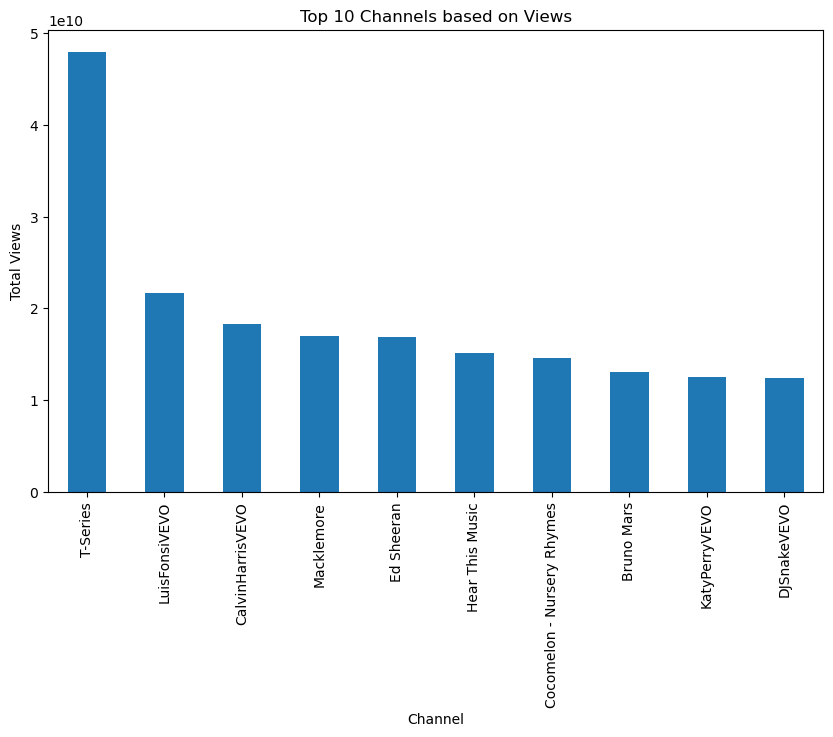


Remarks about the Top 10 Channels:
These channels have accumulated the highest total views on YouTube.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\zaira\Downloads\Spotify_Youtube.csv')
print(df.head(10))

print("\nThe column names are: ", end=' ')
for col in df.columns:
    print(col, end=', ')

print("\nThe info about the data set is: ", end=' ')
print(df.info())

num_columns=df.shape[1]
print("\nThe number of columns is %d" %(num_columns))

data_points = df.shape[0] * df.shape[1]
print("\nThe number of data points is %d" %(data_points))

get_null=df.isnull().any()
null_columns = df.columns[get_null].tolist()
print("\nThe columns with null values are:", null_columns)

datatype_counts=df.dtypes.value_counts()
print("\nThe data type counts are:")
print(datatype_counts.to_string())

df[['Likes', 'Comments']]=df[['Likes', 'Comments']].fillna(value=0)
df=df.dropna()

print(df.describe())

album_count=df['Album_type'].value_counts()['album']
single_count=df['Album_type'].value_counts()['single'] 
compilation_count=df['Album_type'].value_counts()['compilation'] 
print("\nThe count for album is %d.\nThe count for single is %d.\nThe count for compilation is %d." %(album_count,single_count,compilation_count))


album_data = df['Album_type'].value_counts()
plt.pie(x=album_data, labels=album_data.index, autopct="%.1f%%", pctdistance=0.5)
plt.title('Album Types')
plt.show()


top_10_youtube = df.groupby('Artist')['Views'].sum().nlargest(10)
print(top_10_youtube)

top_10_spotify = df.groupby('Artist')['Stream'].sum().nlargest(10)
print(top_10_spotify)

categories = top_10_youtube.index
values1 = top_10_youtube.values
values2 = top_10_spotify.values

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.barh(categories, values1, color='maroon')
ax1.set(title='Top 10 Artists on YouTube')
ax1.set_xlabel('Total Views')
ax1.set_ylabel('Artist')

ax2.barh(categories, values2, color='green')
ax2.set(title='Top 10 Artists on Spotify')
ax2.set_xlabel('Total Streams')
ax2.set_ylabel('Artist')

plt.tight_layout()
plt.show()


print("\nRemarks about the Top 10 Artists on Youtube:")
print("These artists have accumulated the highest total views on YouTube.")

print("\nRemarks about the Top 10 Artists on Spotify:")
print("These artists have accumulated the highest total streams on Spotify.")


top_10_views = df.nlargest(10, 'Views')
top_10_comments = df.nlargest(10, 'Comments')
top_10_likes = df.nlargest(10, 'Likes')

print("\nTop 10 Songs with Most Views:")
print(top_10_views[['Track', 'Views']])

print("\nTop 10 Songs with Most Comments:")
print(top_10_comments[['Track', 'Comments']])

print("\nTop 10 Songs with Most Likes:")
print(top_10_likes[['Track', 'Likes']])


print("\nRemarks about the Top 10 Songs:")
print("These songs have achieved the highest number of views, comments, and likes, respectively.")


song_analysis = df[['Track', 'Energy', 'Danceability']]
print("\nAnalysis of Songs based on Energy and Danceability:")
print(song_analysis.head(10))


top_10_streams = df.nlargest(10, 'Stream')
plt.figure(figsize=(10, 6))
sns.barplot(x='Stream', y='Track', data=top_10_streams, hue='Track', dodge=False)
plt.xlabel('Stream')
plt.ylabel('Track')
plt.title('Top 10 Songs by Stream with Energy, Danceability, and Acousticness')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


print("\nRemarks about the Top 10 Songs by Stream:")
print("These songs have the highest number of streams on Spotify.")


top_10_likes_artist = df.groupby('Artist')['Likes'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_likes_artist.plot(kind='bar')
plt.title('Number of Likes per Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Likes')
plt.show()

print("\nRemarks about the Top 10 Artists with Most Likes:")
print("These artists have songs with the highest total likes on YouTube.")


single_releases = df[df['Album_type'] == 'single']
top_performers_single = single_releases.groupby('Artist').agg({'Views': 'sum', 'Likes': 'sum'}).nlargest(10, 'Likes')
print("\nTop Performers based on Single Releases:")
print(top_performers_single)

print("\nRemarks about Single Releases:")
print("These artists have the highest total likes for their single releases on YouTube.")


compilation_releases = df[df['Album_type'] == 'compilation']
top_performers_compilation = compilation_releases.groupby('Artist').agg({'Views': 'sum', 'Likes': 'sum'}).nlargest(10, 'Views')
print("\nTop Performers based on Compilation Releases:")
print(top_performers_compilation)

print("\nRemarks about Compilation Releases:")
print("These artists have the highest total views for their compilation releases on YouTube.")


top_10_channels = df.groupby('Channel')['Views'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_channels.plot(kind='bar')
plt.title('Top 10 Channels based on Views')
plt.xlabel('Channel')
plt.ylabel('Total Views')
plt.show()

print("\nRemarks about the Top 10 Channels:")
print("These channels have accumulated the highest total views on YouTube.")